In [2]:
#import modules
import pandas as pd  # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs


In [3]:
#read the excel file
excelfile=pd.ExcelFile('Employee.xlsx')

In [4]:
#access the 'left employess'sheet
df1=excelfile.parse('Employees who have left')
#print(df1)

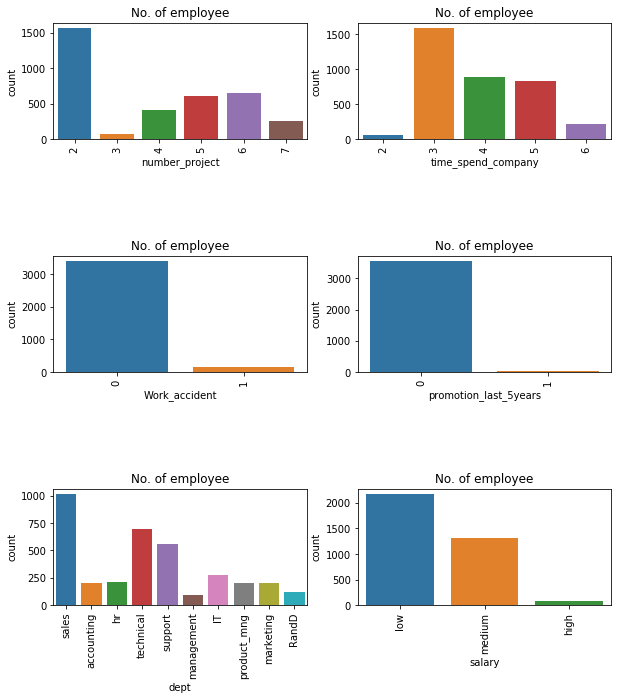

In [4]:
#use Seaborn library and plot all the graphs in a single run using subplots#
features=['number_project','time_spend_company','Work_accident', 'promotion_last_5years','dept','salary']
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = df1)
    plt.xticks(rotation=90)
    plt.title("No. of employee")    

In [5]:
#access the"current employee'sheet
df2=excelfile.parse('Existing employees')
#print(df2)

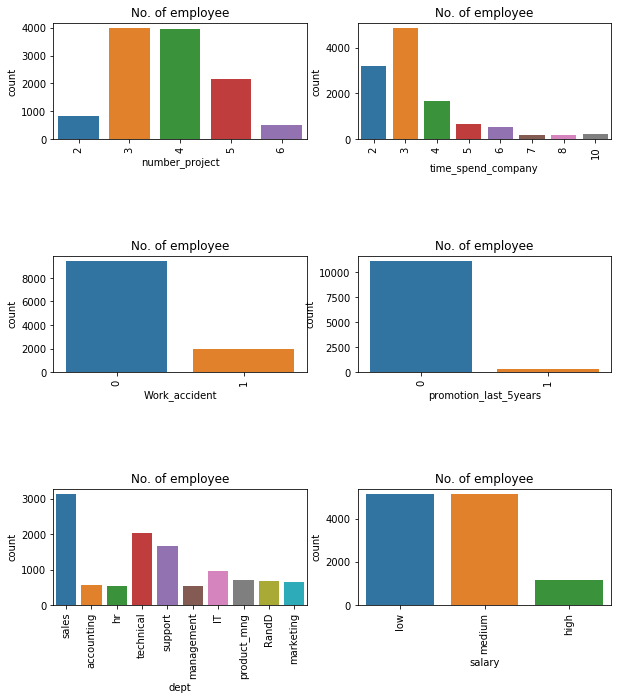

In [6]:
features=['number_project','time_spend_company','Work_accident', 'promotion_last_5years','dept','salary']
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = df2)
    plt.xticks(rotation=90)
    plt.title("No. of employee") 

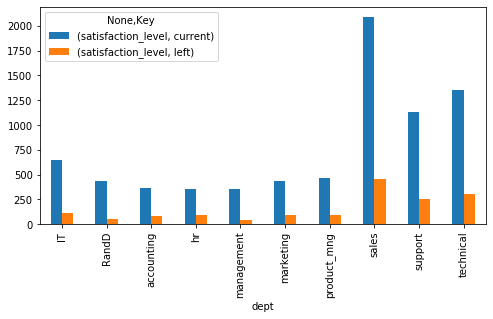

In [7]:
#compare between 'left employee'&'current employee'
# 'last_evaluation','number_project','average_montly_hour','time_spend_company','Work_accident','promotion_last_5years'

store1 = pd.DataFrame(df1, columns=['dept','satisfaction_level'])
store2 = pd.DataFrame(df2, columns=['dept','satisfaction_level'])

store1['Key'] = 'left'
store2['Key'] = 'current'

DF = pd.concat([store1,store2],keys=['left','current'])

DFGroup = DF.groupby(['dept','Key'])

fig_dims = (8,4)
DFGPlot = DFGroup.sum().unstack('Key').plot(kind='bar',figsize=fig_dims)

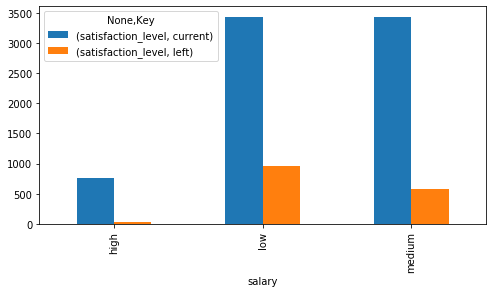

In [8]:
store1 = pd.DataFrame(df1, columns=['salary','satisfaction_level',])
store2 = pd.DataFrame(df2, columns=['salary','satisfaction_level',])

store1['Key'] = 'left'
store2['Key'] = 'current'

DF = pd.concat([store1,store2],keys=['left','current'])

DFGroup = DF.groupby(['salary','Key'])

fig_dims = (8,4)
DFGPlot = DFGroup.sum().unstack('Key').plot(kind='bar',figsize=fig_dims)

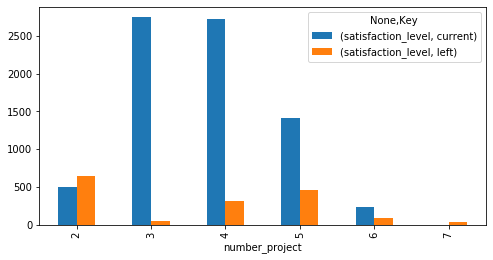

In [9]:
store1 = pd.DataFrame(df1, columns=['number_project','satisfaction_level',])
store2 = pd.DataFrame(df2, columns=['number_project','satisfaction_level',])

store1['Key'] = 'left'
store2['Key'] = 'current'

DF = pd.concat([store1,store2],keys=['left','current'])

DFGroup = DF.groupby(['number_project','Key'])

fig_dims = (8,4)
DFGPlot = DFGroup.sum().unstack('Key').plot(kind='bar',figsize=fig_dims)

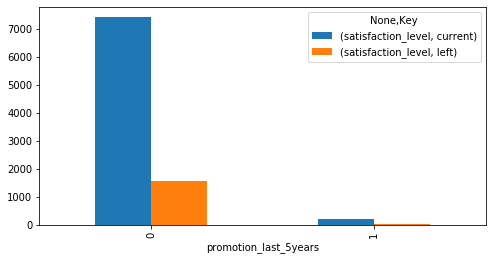

In [18]:
store1 = pd.DataFrame(df1, columns=['promotion_last_5years','satisfaction_level'])
store2 = pd.DataFrame(df2, columns=['promotion_last_5years','satisfaction_level'])

store1['Key'] = 'left'
store2['Key'] = 'current'

DF = pd.concat([store1,store2],keys=['left','current'])

DFGroup = DF.groupby(['promotion_last_5years','Key'])

fig_dims = (8,4)
DFGPlot = DFGroup.sum().unstack('Key').plot(kind='bar',figsize=fig_dims)

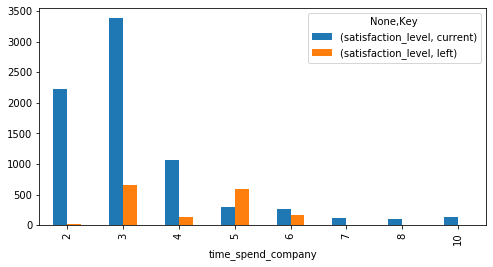

In [19]:
store1 = pd.DataFrame(df1, columns=['time_spend_company','satisfaction_level',])
store2 = pd.DataFrame(df2, columns=['time_spend_company','satisfaction_level',])

store1['Key'] = 'left'
store2['Key'] = 'current'

DF = pd.concat([store1,store2],keys=['left','current'])

DFGroup = DF.groupby(['time_spend_company','Key'])

fig_dims = (8,4)
DFGPlot = DFGroup.sum().unstack('Key').plot(kind='bar',figsize=fig_dims)

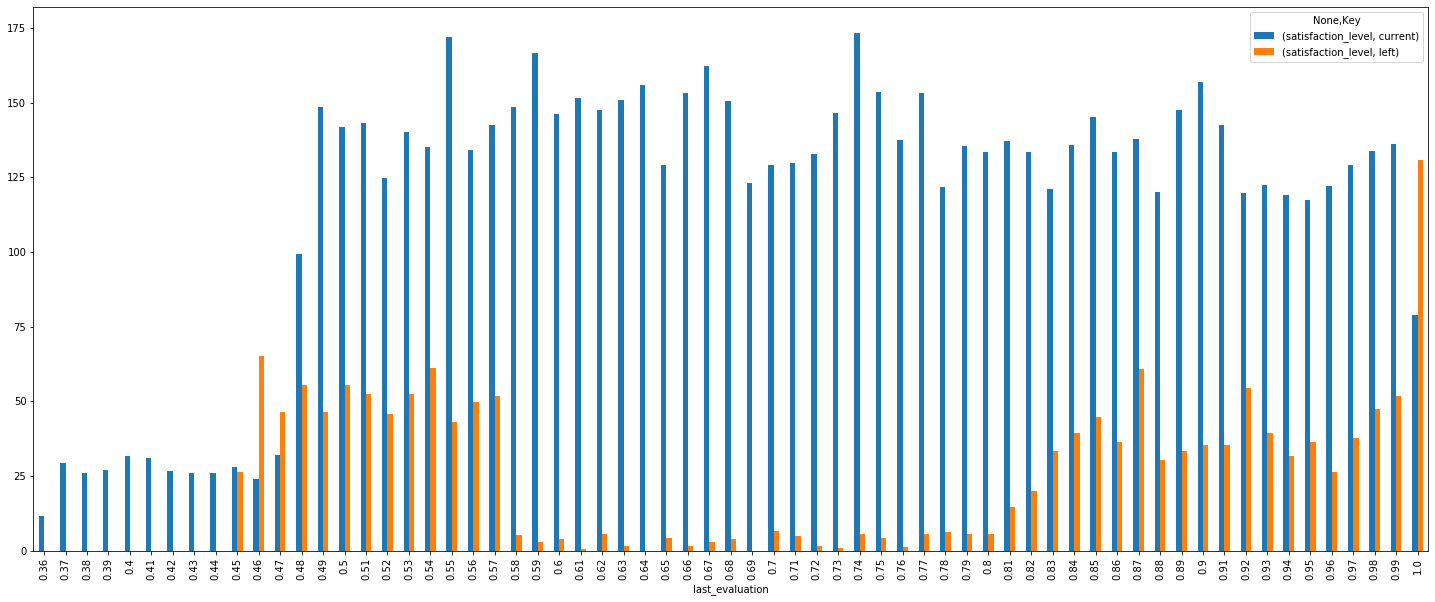

In [12]:
#compare between 'left employee'&'current employee'
# 'last_evaluation','number_project','average_montly_hour','time_spend_company','Work_accident','promotion_last_5years'

store1 = pd.DataFrame(df1, columns=['last_evaluation','satisfaction_level'])
store2 = pd.DataFrame(df2, columns=['last_evaluation','satisfaction_level'])

store1['Key'] = 'left'
store2['Key'] = 'current'

DF = pd.concat([store1,store2],keys=['left','current'])

DFGroup = DF.groupby(['last_evaluation','Key'])

fig_dims = (25,10)
DFGPlot = DFGroup.sum().unstack('Key').plot(kind='bar',figsize=fig_dims)

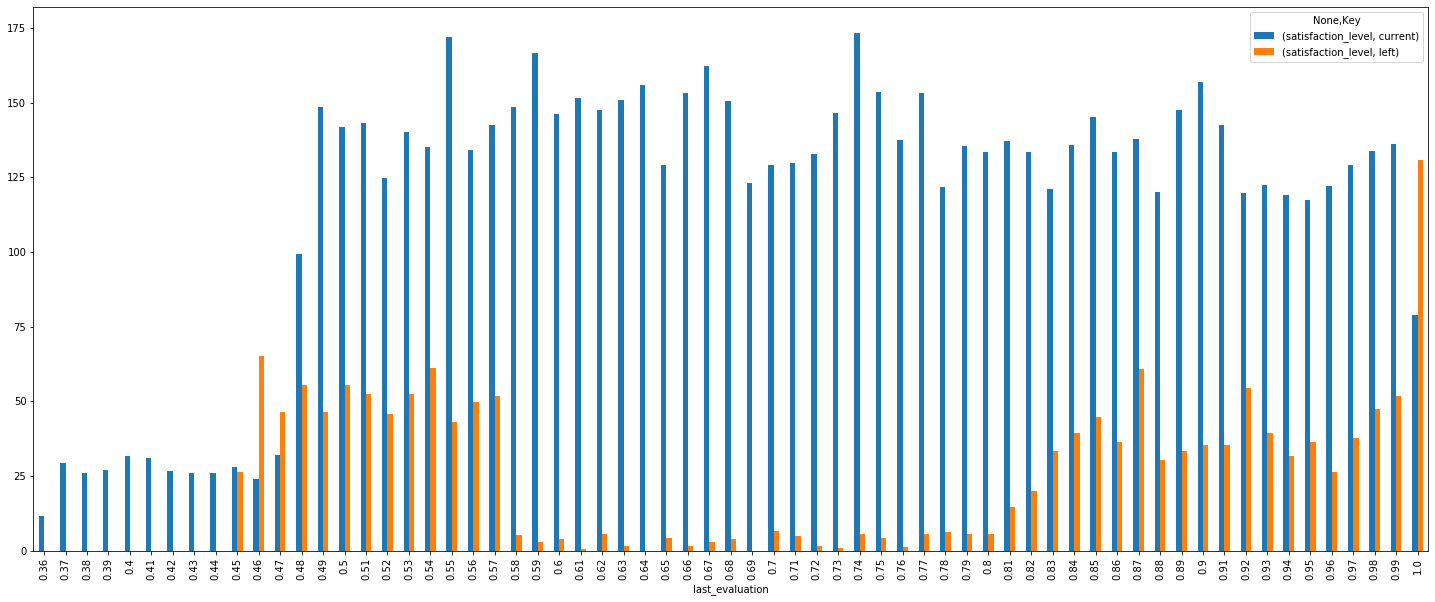

In [9]:
#compare between 'left employee'&'current employee'
# 'last_evaluation','number_project','average_montly_hour','time_spend_company','Work_accident','promotion_last_5years'

store1 = pd.DataFrame(df1, columns=['last_evaluation','satisfaction_level'])
store2 = pd.DataFrame(df2, columns=['last_evaluation','satisfaction_level'])

store1['Key'] = 'left'
store2['Key'] = 'current'

DF = pd.concat([store1,store2],keys=['left','current'])

DFGroup = DF.groupby(['last_evaluation','Key'])

fig_dims = (20,10)
DFGPlot = DFGroup.sum().unstack('Key').plot(kind='bar',figsize=fig_dims)

In [20]:
#clusterring
#import module
from sklearn.cluster import KMeans
# Filter data
left_emp =  df1[['satisfaction_level', 'last_evaluation']]
# Create groups using K-means clustering.
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(left_emp)

C:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


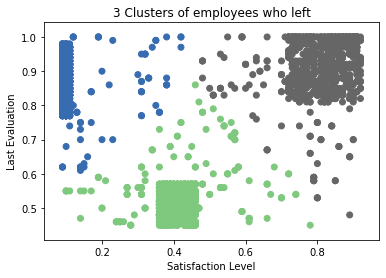

In [21]:
# Add new column "label" annd assign cluster labels.
left_emp['label'] = kmeans.labels_
# Draw scatter plot
plt.scatter(left_emp['satisfaction_level'], left_emp['last_evaluation'], c=left_emp['label'],cmap='Accent')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('3 Clusters of employees who left')
plt.show()

In [6]:
#add new col.'left'for further splitting purpose
df2.insert(10,"left",0)


In [7]:
df1.insert(10,"left",1)

In [8]:
#concat the dataframes
df3=pd.concat([df1, df2])

In [14]:
#Spliting data into Feature
X=df3[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dept', 'salary']]
y=df3['left']

In [11]:
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
df3['salary']=le.fit_transform(df3['salary'])
df3['dept']=le.fit_transform(df3['dept'])

In [15]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% training and 30% testing

In [16]:
#Use Random Forest Classification algorithm
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [17]:
#Get the accuracy on the training data
print("the accuracy:",forest.score(X_train, y_train))

the accuracy: 0.9986665396704448


In [18]:
#Show the confusion matrix and accuracy for  the model on the test data
#Classification accuracy is the ratio of correct predictions to total predictions made.
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, forest.predict(X_test))
  
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]
  
print(cm)
print('Model Testing Accuracy = "{}!"'.format(  (TP + TN) / (TP + TN + FN + FP)))
print()# Print a new line

[[3418    3]
 [  46 1033]]
Model Testing Accuracy = "0.9891111111111112!"



In [20]:
Precision=TP/(TP+FP)
print("precision:",Precision)
Recall=TP/(TP+FN)
print("Recall:",Recall)

precision: 0.997104247104247
Recall: 0.9573679332715477


In [22]:
# Return the feature importances (the higher, the more important the feature).
import numpy as np
importances = pd.DataFrame({'feature':df3[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dept', 'salary']],'importance':np.round(forest.feature_importances_,3)}) 
#Note: The target column is at position 0
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
"(s, a, t, i, s, f, a, c, t, i, o, n, _, l, e, v, e, l)",0.324
"(t, i, m, e, _, s, p, e, n, d, _, c, o, m, p, a, n, y)",0.232
"(n, u, m, b, e, r, _, p, r, o, j, e, c, t)",0.173
"(a, v, e, r, a, g, e, _, m, o, n, t, l, y, _, h, o, u, r, s)",0.123
"(l, a, s, t, _, e, v, a, l, u, a, t, i, o, n)",0.106
"(d, e, p, t)",0.020
"(s, a, l, a, r, y)",0.014
"(W, o, r, k, _, a, c, c, i, d, e, n, t)",0.007
"(p, r, o, m, o, t, i, o, n, _, l, a, s, t, _, 5, y, e, a, r, s)",0.001


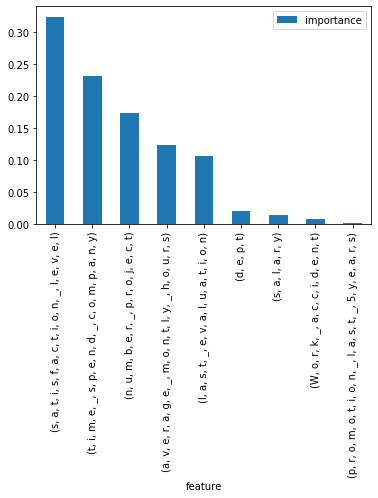

In [23]:
#Visualize the importance
importances.plot.bar()

In [24]:
print(importances)

                                                    importance
feature                                                       
(s, a, t, i, s, f, a, c, t, i, o, n, _, l, e, v...       0.324
(t, i, m, e, _, s, p, e, n, d, _, c, o, m, p, a...       0.232
(n, u, m, b, e, r, _, p, r, o, j, e, c, t)               0.173
(a, v, e, r, a, g, e, _, m, o, n, t, l, y, _, h...       0.123
(l, a, s, t, _, e, v, a, l, u, a, t, i, o, n)            0.106
(d, e, p, t)                                             0.020
(s, a, l, a, r, y)                                       0.014
(W, o, r, k, _, a, c, c, i, d, e, n, t)                  0.007
(p, r, o, m, o, t, i, o, n, _, l, a, s, t, _, 5...       0.001


In [ ]:
#drop unnecessary column.
df3=df3.drop('Emp ID',axis=1)

In [50]:
#gropu the "left" column
left = df3.groupby('left')
left.mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
left,,,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251,5.819041,1.347742
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321,6.035284,1.345842
